<a href="https://colab.research.google.com/github/Malonadata/AmplitudeVersusOffset/blob/main/Predict_Vs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Benar_44 = pd.read_csv("https://www.dropbox.com/s/fy4oxmciv4pkylj/Benar-44.csv?dl=1", sep = ";")
Benar_45 = pd.read_csv("https://www.dropbox.com/s/9xhs8q03amif6sn/Benar-45.csv?dl=1", sep = ";")

In [ ]:
Benar_44

,DEPTH,GR,DT,DTS,DRES,RHOB
0,700.0,82.7897,-999.2500,171.6312,1.3829,2.0195
1,700.5,84.8998,-999.2500,170.1264,0.9854,1.9719
2,701.0,89.7544,-999.2500,169.4135,0.8453,1.9374
3,701.5,90.5153,-999.2500,168.3756,0.7940,1.9504
4,702.0,94.1483,-999.2500,169.0359,0.9666,1.9770
...,...,...,...,...,...,...
3892,2646.0,71.7225,73.5504,130.6303,64.9451,2.4426
3893,2646.5,71.7225,73.5504,130.6303,75.6984,2.4426
3894,2647.0,71.7225,73.5504,130.6303,81.0247,2.4426
3895,2647.5,71.7225,73.5504,130.6303,79.8131,2.4426


In [ ]:
Top_Shale_B44 = Benar_44.loc[:1621, 'DT':'DTS']
Sand_B44 = Benar_44.loc[1621:1721, 'DT':'DTS']
Base_Shale_B44 = Benar_44.loc[1721:1941, 'DT':'DTS']

Shale_B44 = [Top_Shale_B44 ,Base_Shale_B44 ]
Shale_B44 = pd.concat(Shale_B44, ignore_index=True)

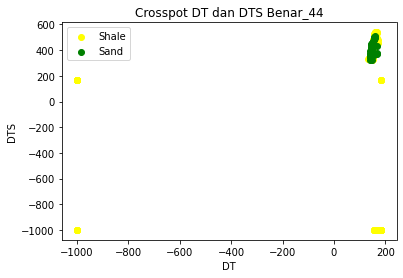

In [ ]:
%matplotlib inline 
plt.xlabel('DT')
plt.ylabel('DTS')
plt.title ('Crosspot DT dan DTS Benar_44')
plt.scatter(Shale_B44.DT,Shale_B44.DTS, color='yellow', label = 'Shale')
plt.scatter(Sand_B44.DT,Sand_B44.DTS, color='green', label ='Sand')
plt.legend()


In [ ]:
Benar_45

,DEPTH,DRES,DT,DTS,GR,SRES,RHOB
0,700.0,2.2002,-999.25,177.1833,82.0615,0.2972,2.1679
1,700.5,1.3079,-999.25,178.9678,87.0599,0.9606,2.0261
2,701.0,0.6888,-999.25,175.3557,91.5664,0.9439,1.9818
3,701.5,0.7885,-999.25,173.3515,105.7637,0.9078,1.9563
4,702.0,0.8927,-999.25,170.9711,115.1710,1.0774,1.9337
...,...,...,...,...,...,...,...
4380,2890.0,343.6923,-999.25,-999.2500,181.5111,212.7396,2.6222
4381,2890.5,326.0213,-999.25,-999.2500,181.5111,218.8065,2.6222
4382,2891.0,307.8252,-999.25,-999.2500,181.5111,228.5205,2.6222
4383,2891.5,292.7930,-999.25,-999.2500,181.5111,239.6411,2.6222


In [ ]:
Top_Shale_B45 = Benar_45.loc[:501, 'DT':'DTS']
Sand_B45 = Benar_45.loc[501:601, 'DT':'DTS']
Base_Shale_B45 = Benar_45.loc[601:1401, 'DT':'DTS']

Shale_B45 = [Top_Shale_B45 ,Base_Shale_B45 ]
Shale_B45 = pd.concat(Shale_B45, ignore_index=True)

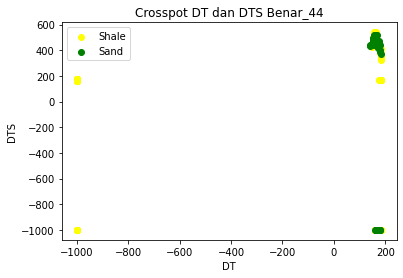

In [ ]:
%matplotlib inline
plt.xlabel('DT')
plt.ylabel('DTS')
plt.title ('Crosspot DT dan DTS Benar_45')
plt.scatter(Shale_B45.DT,Shale_B45.DTS, color='yellow', label = 'Shale')
plt.scatter(Sand_B45.DT,Sand_B45.DTS, color='green', label ='Sand')
plt.legend()


**PENGGABUNGAN DATA BENAR 44 DAN BENAR 45**

In [ ]:
SHALE = [Shale_B44, Shale_B45]
SHALE = pd.concat(SHALE, ignore_index=True)
SHALE = SHALE[SHALE['DT']>0]
SHALE = SHALE[SHALE['DTS']>0]

SAND= [Sand_B44, Sand_B45]
SAND = pd.concat(SAND, ignore_index=True)
SAND = SAND[SAND['DT']>0]
SAND = SAND[SAND['DTS']>0]

In [ ]:
SHALE

,DT,DTS
61,181.2761,169.2683
62,181.2412,169.9656
63,181.4029,169.0297
64,181.2595,168.2242
65,181.1549,168.6964
...,...,...
3114,158.3884,533.4871
3115,158.9716,534.1403
3143,162.3477,538.7919
3144,161.5543,538.7919


In [ ]:
SHALE.to_csv('shale', index=0)

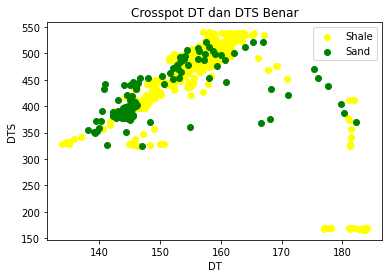

In [ ]:
%matplotlib inline
plt.xlabel('DT')
plt.ylabel('DTS')
plt.title ('Crosspot DT dan DTS Benar')
plt.scatter(SHALE.DT,SHALE.DTS, color='yellow', label = 'Shale')
plt.scatter(SAND.DT,SAND.DTS, color='green', label ='Sand')
plt.legend()

In [ ]:
persamaan_shale= np.polyfit(SHALE.DT,SHALE.DTS,1)
persamaan

array([ -3.27002668, 980.86853918])

In [ ]:
persamaan_sand= np.polyfit(SAND.DT,SAND.DTS,1)
persamaan

array([ -3.27002668, 980.86853918])